#Defining the Hypothesis#


We aim to test whether users who interact with an AI chatbot convert at a higher rate than those who don’t.

Null Hypothesis (H₀): The conversion rate is the same for both groups.
Alternative Hypothesis

(H₁): Users who interact with the chatbot have a higher conversion rate than those who don’t.

Since we are comparing categorical data (converted vs. not converted across two groups), we use a Chi-square test for proportions and Bayesian inference.bold text bold text

#Power Analysis – Determining Sample Size

Before running the experiment, we should calculate how many users we need per group to detect a meaningful effect.

Why Power Analysis?

Ensures our sample size is large enough to detect a true effect.

Prevents underpowered tests that might lead to incorrect conclusions.

Assumptions:

Expected conversion rate with chatbot = 18%

Expected conversion rate without chatbot = 12%

Significance level (α) = 0.05

Power (1 - β) = 0.8 (80% probability of detecting an effect)

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower

# Set seed for reproducibility
np.random.seed(42)

# Define expected conversion rates
p1 = 0.18  # Chatbot conversion rate
p2 = 0.12  # No chatbot conversion rate
alpha = 0.05  # Significance level
power = 0.8  # Desired statistical power

# Effect size calculation
effect_size = stats.norm.ppf(1 - alpha/2) * np.sqrt(2 * (p1 * (1 - p1) + p2 * (1 - p2)))

# Calculate required sample size per group
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative="larger")
sample_size = int(np.ceil(sample_size))

print(f"📌 Required Sample Size (Per Group): {sample_size}")


📌 Required Sample Size (Per Group): 7


#Generating Dummy Data

We simulate conversion data based on the calculated sample size per group.

In [8]:
# Simulating Experiment Data
total_users = sample_size  # Use computed sample size
chatbot_conversions = np.random.binomial(n=total_users, p=p1)
no_chatbot_conversions = np.random.binomial(n=total_users, p=p2)

# Create a contingency table
observed = np.array([
    [chatbot_conversions, total_users - chatbot_conversions],
    [no_chatbot_conversions, total_users - no_chatbot_conversions]
])

# Convert to DataFrame for readability
conversion_df = pd.DataFrame(
    observed,
    columns=["Converted", "Not Converted"],
    index=["With Chatbot", "Without Chatbot"]
)

print("\n📊 Conversion Data:")
print(conversion_df)



📊 Conversion Data:
                 Converted  Not Converted
With Chatbot             1              6
Without Chatbot          2              5


#Performing Chi-Square Test

This test determines if the difference in conversion rates is statistically significant

In [9]:
# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Calculate Effect Size (Cramér’s V)
cramers_v = np.sqrt(chi2 / (np.sum(observed) * (min(observed.shape) - 1)))

# Print results
print("\n📊 Hypothesis Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Cramér’s V (Effect Size): {cramers_v:.4f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("\n✅ Conclusion: The chatbot significantly improves conversions!")
else:
    print("\n❌ Conclusion: No significant impact detected.")



📊 Hypothesis Test Results:
Chi-Square Statistic: 0.0000
P-value: 1.0000
Cramér’s V (Effect Size): 0.0000

❌ Conclusion: No significant impact detected.


#Bayesian A/B Testing

Frequentist methods (like the Chi-square test) only tell us whether an effect is statistically significant, but not how probable it is that the chatbot performs better.

Why Bayesian?

It calculates the probability that the chatbot is better.

More intuitive than a simple p-value.

In [10]:
# Bayesian A/B Test Approximation
posterior_a = np.random.beta(chatbot_conversions + 1, total_users - chatbot_conversions + 1, 10000)
posterior_b = np.random.beta(no_chatbot_conversions + 1, total_users - no_chatbot_conversions + 1, 10000)
prob = (posterior_a > posterior_b).mean()

print(f"\n🔍 Bayesian Probability that Chatbot is Better: {prob:.2%}")



🔍 Bayesian Probability that Chatbot is Better: 28.75%


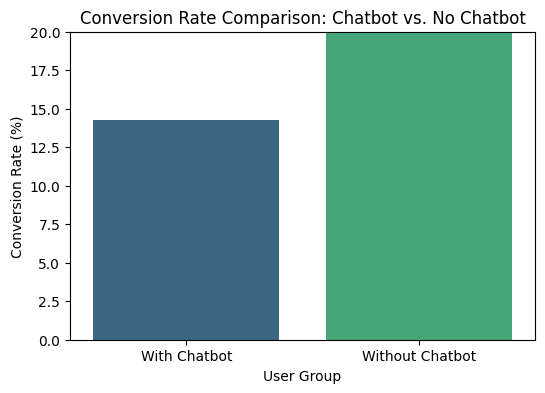

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for visualization
df = pd.DataFrame({
    "Group": ["With Chatbot", "Without Chatbot"],
    "Conversion Rate (%)": [(chatbot_conversions / total_users) * 100,
                            (no_chatbot_conversions / total_users) * 100]
})

# Plot the conversion rates
plt.figure(figsize=(6, 4))
sns.barplot(x="Group", y="Conversion Rate (%)", hue="Group", data=df, palette="viridis", legend=False)
plt.title("Conversion Rate Comparison: Chatbot vs. No Chatbot")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("User Group")
plt.ylim(0, 20)
plt.show()

#Conclusion and Key Takeaways for Growth Teams

Understanding conversion impact: Not all chatbots improve conversions; test and analyze before implementing.

Segment users: Break down results by user types (new vs. returning) for deeper insights.

Experiment further: Try different chatbot prompts and interaction styles to optimize engagement.

Measure secondary effects: Look beyond conversion rates—track engagement, retention, and session duration.

🔍 Want to go even further?

✅ Test different chatbot prompts to see which works best.

✅ Analyze by user segments (new vs. returning users).

✅ Measure secondary effects (time on site, engagement, retention).